# Name:** Tushar Jitendrakumar Limbachiya  
# Course:** MSCS 634 – Machine Learning  
# Lab Assignment:** Lab 2 – Classification Using KNN and RNN Algorithms  


In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Load the dataset
wine = load_wine()
X = wine.data
y = wine.target

# Basic data exploration
df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y
print(df.head())
print(df['target'].value_counts())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

k_values = [1, 5, 11, 15, 21]
knn_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    knn_accuracies.append(acc)
    print(f"K={k} -> Accuracy: {acc:.4f}")


K=1 -> Accuracy: 0.7778
K=5 -> Accuracy: 0.7222
K=11 -> Accuracy: 0.7500
K=15 -> Accuracy: 0.7500
K=21 -> Accuracy: 0.7778


In [3]:
from sklearn.neighbors import RadiusNeighborsClassifier

radius_values = [350, 400, 450, 500, 550, 600]
rnn_accuracies = []

for radius in radius_values:
    rnn = RadiusNeighborsClassifier(radius=radius, outlier_label=-1)
    try:
        rnn.fit(X_train, y_train)
        y_pred = rnn.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        rnn_accuracies.append(acc)
        print(f"Radius={radius} -> Accuracy: {acc:.4f}")
    except ValueError as e:
        print(f"Radius={radius} -> Error: {e}")
        rnn_accuracies.append(np.nan)


Radius=350 -> Accuracy: 0.7500
Radius=400 -> Accuracy: 0.7222
Radius=450 -> Accuracy: 0.7222
Radius=500 -> Accuracy: 0.7222
Radius=550 -> Accuracy: 0.7222
Radius=600 -> Accuracy: 0.7222


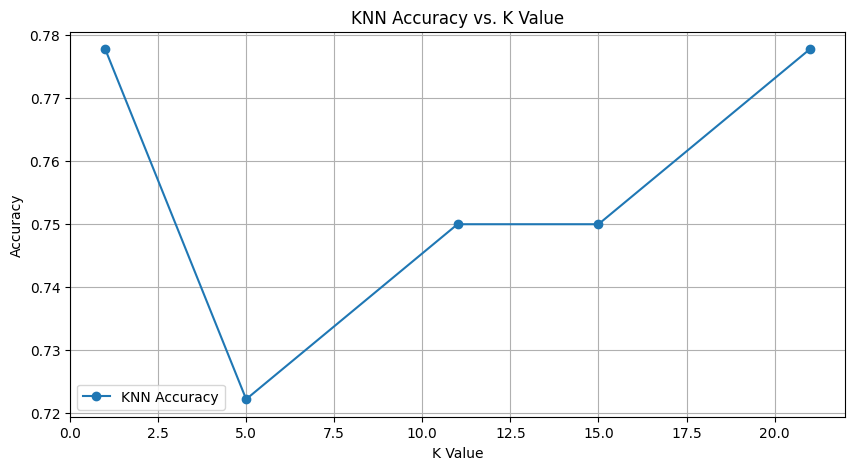

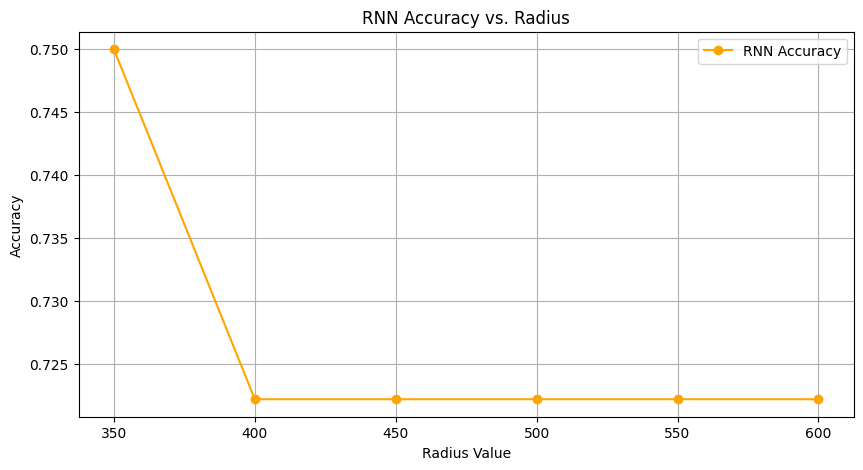

In [4]:
# KNN plot
plt.figure(figsize=(10,5))
plt.plot(k_values, knn_accuracies, marker='o', label='KNN Accuracy')
plt.title('KNN Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

# RNN plot
plt.figure(figsize=(10,5))
plt.plot(radius_values, rnn_accuracies, marker='o', color='orange', label='RNN Accuracy')
plt.title('RNN Accuracy vs. Radius')
plt.xlabel('Radius Value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()
